In [1]:
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

/cluster/apps/nss/gcc-8.2.0/python/3.10.4/x86_64/lib64/python3.10/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cluster/apps/nss/gcc-8.2.0/python/3.10.4/x86_64/lib64/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/cluster/apps/nss/gcc-8.2.0/python/3.10.4/x86_64/lib64/python3.10/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cluster/apps/nss/gcc-8.2.0/python/3.10.4/x86_64/lib64/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_s

In [2]:
api = wandb.Api()
# Project is specified by <entity/project-name>
runs = api.runs("pl-nc/permuted_mnist_small")

In [ ]:
runs[]

In [98]:
results = {}
for run in runs:
    
    if not("100n_1epoch_0.01" in run.name or "num_epochs_1_run_" in run.name):
        continue
    
    df = run.history(pandas=True)
    res = df[["accuracies", "_step"]].iloc[:140]
    res["nc1"] = df["nc1"].iloc[1:141].to_numpy()
    res = res.drop(columns = "_step")
    results[run.name] = res

In [100]:
results["100n_1epoch_0.01"].head()

,accuracies,nc1
0,0.923382,0.232308
1,0.926065,0.234507
2,0.921565,0.226706
3,0.919532,0.232991
4,0.914449,0.240302


In [101]:
ac_df = pd.DataFrame()
nc_df = pd.DataFrame()

for result in results.values():
    ac_df = pd.concat([ac_df, result["accuracies"]], axis =1)
    nc_df = pd.concat([nc_df, result["nc1"]], axis = 1)
    
ac_mean = ac_df.mean(axis = 1).to_numpy().astype(float)
ac_std = ac_df.std(axis = 1).to_numpy().astype(float)

nc_mean = nc_df.mean(axis = 1).to_numpy().astype(float)
nc_std = nc_df.std(axis = 1).to_numpy().astype(float)

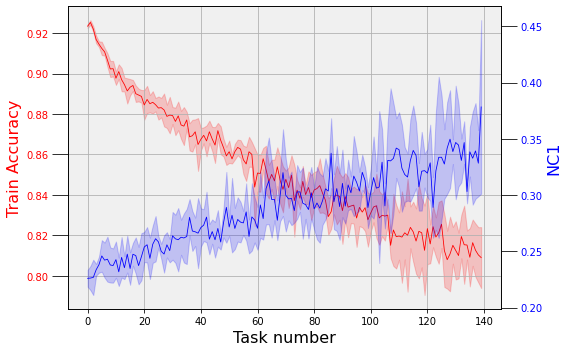

In [112]:
fig, ax1 = plt.subplots(figsize=(8, 5))
colors = plt.cm.get_cmap('plasma', 3)

c1 = "red" #colors(0)
c2 = "blue" #colors(1)

ax1.set_xlabel('Task number', size=16)
ax1.set_ylabel('Train Accuracy', color=c1, size=16)
ax1.tick_params(axis='y', labelcolor=c1, size=16)
ax1.plot(ac_mean, label="Train accuracy", color = c1, linewidth = 0.8)
ax1.fill_between(list(range(len(ac_mean))), ac_mean - ac_std, ac_mean + ac_std, alpha=0.2, color=c1)

ax2 = ax1.twinx()
ax2.set_ylabel('NC1', color=c2, size=16)  # we already handled the x-label with ax1
ax2.plot(nc_mean, label="NC1", color = c2,  linewidth =  0.8)
ax2.fill_between(list(range(len(nc_mean))), nc_mean - nc_std, nc_mean + nc_std, alpha=0.2, color=c2)
ax2.tick_params(axis='y', labelcolor=c2, size=16)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.set_facecolor('#f0f0f0')
# plt.title('Correlation of train accuracy and NC1')
ax1.grid()
fig.savefig("../plots/nc_acc.pdf")
plt.show()

In [103]:
np.corrcoef(ac_mean, nc_mean)

array([[ 1.        , -0.94475558],
       [-0.94475558,  1.        ]])